### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve

)
import joblib

import warnings
warnings.filterwarnings("ignore")


### “This code imports libraries required for data manipulation, visualization, preprocessing, multiple machine learning models, and evaluation, forming a complete end-to-end classification pipeline.”

In [3]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\churns projects chatgpt\\data\\raw\\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.shape

(7032, 21)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## “I removed customerID because it’s a unique identifier and doesn’t help the model learn patterns.”

In [8]:
df.drop(columns =["customerID"],inplace =True)

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors = "coerce")

### “I converted TotalCharges to numeric and coerced invalid values to NaN so they could be handled during imputation.”

### “After converting TotalCharges to numeric, I handled missing values by imputing them using the mean/median to avoid dropping rows and to ensure model compatibility.”

#### Mean → use when data is normally distributed

#### Median → use when data is skewed or has outliers

In [10]:
df["TotalCharges"].fillna(df["TotalCharges"] , inplace = True)

#### “I encoded the target variable into binary format so the model can learn and predict churn effectively.”

In [11]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


#### Creates a manual binary mapping for common binary categorical values.

Iterates over all columns in the DataFrame.

Selects only object (categorical) columns.

Checks whether the column has only binary values (Yes/No or Male/Female).

Converts those values into 0/1 numeric form using .map().

In [12]:
binary_map = {
    "Yes": 1,
    "No": 0,
    "Male": 1,
    "Female": 0
}

for col in df.columns:
    if df[col].dtype == "object":
        if set(df[col].unique()).issubset(binary_map.keys()):
            df[col] = df[col].map(binary_map)


#### Creates a single LabelEncoder instance.

Iterates over all columns in the DataFrame.

Identifies categorical (object-type) columns.

Converts each categorical column into integer labels.

In [13]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

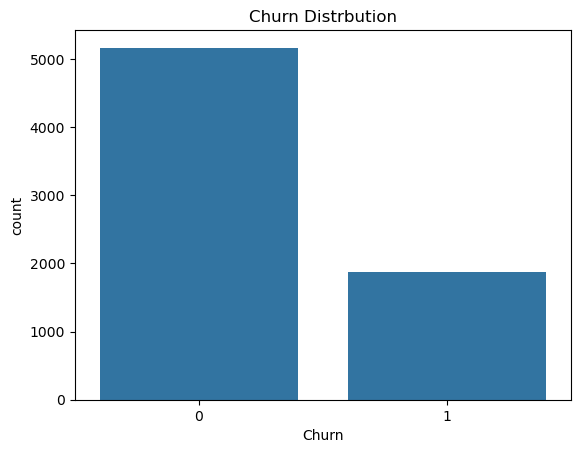

In [16]:
sns.countplot(x="Churn", data = df)
plt.title("Churn Distrbution")
plt.show()

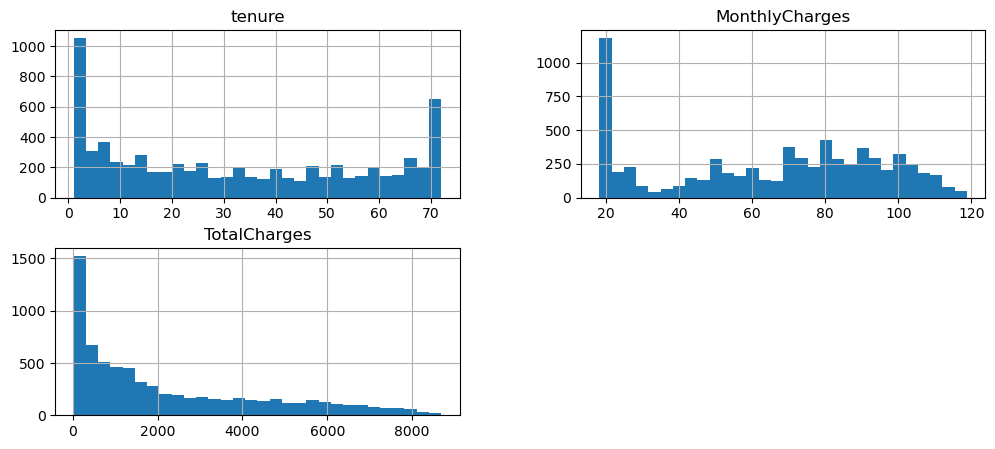

In [17]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].hist(bins=30,figsize=(12,5))
plt.show()

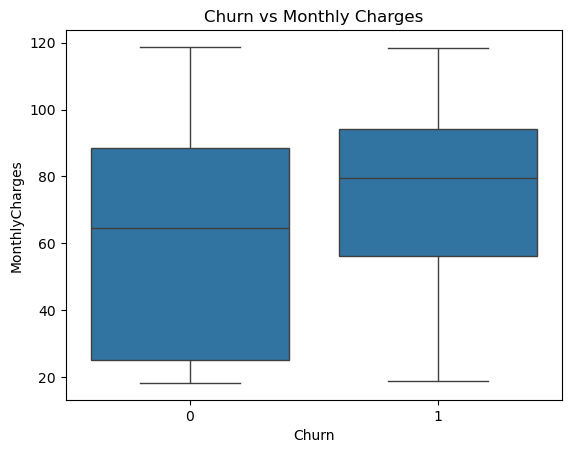

In [18]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Churn vs Monthly Charges")
plt.show()


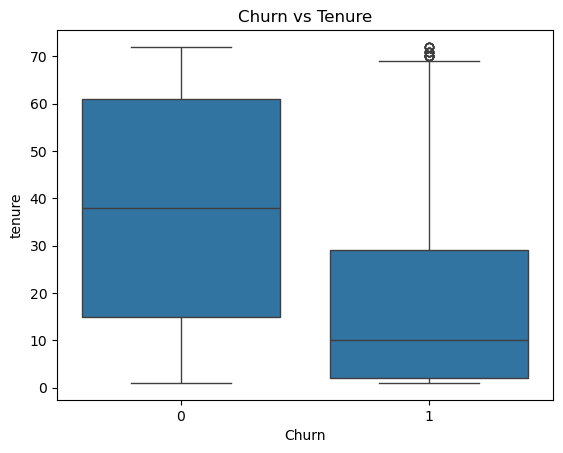

In [19]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Churn vs Tenure")
plt.show()


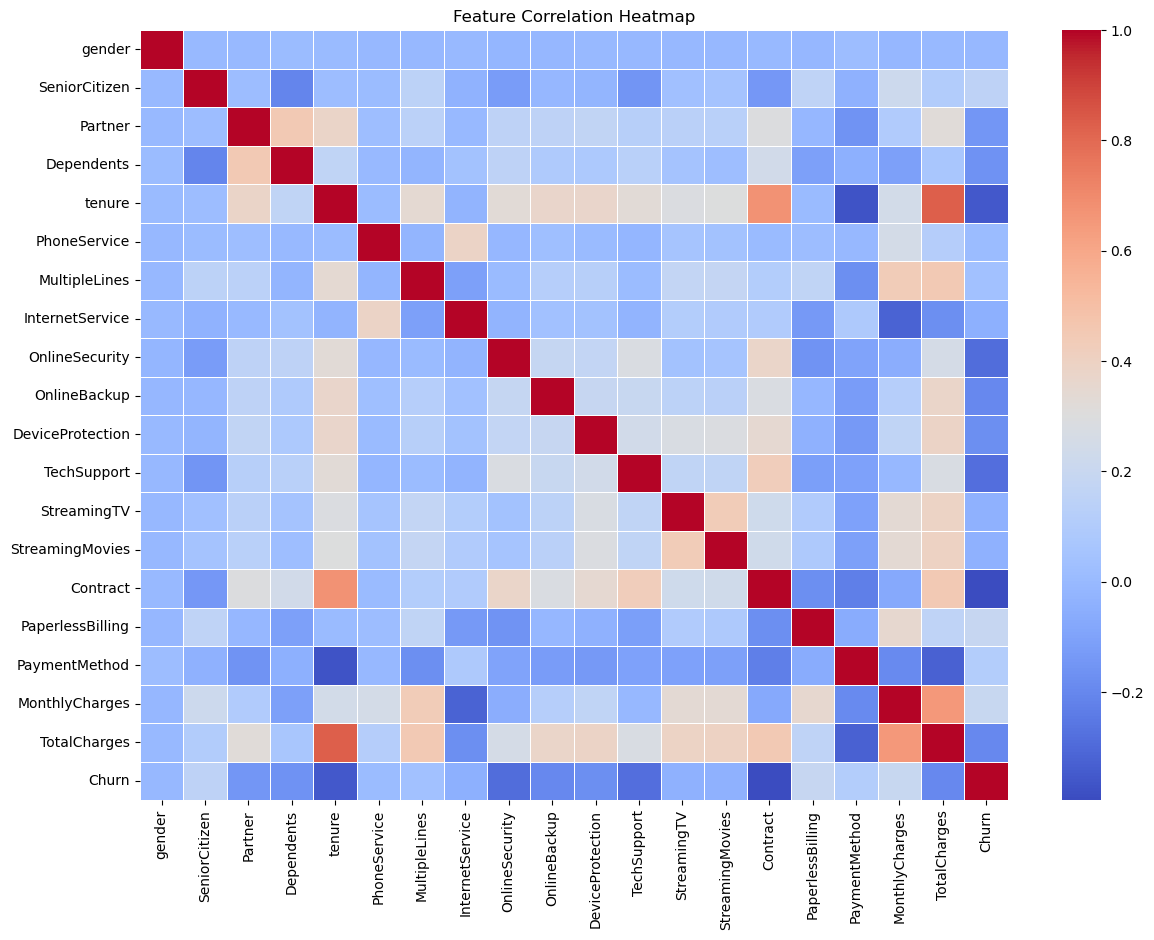

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.4)
plt.title("Feature Correlation Heatmap")
plt.show()


In [21]:
df.to_csv("C:\\Users\\Admin\\Desktop\\churns projects chatgpt\\data\\cleaned\\Cleane_Churn (2).csv" , index=False)


#### Separates the dataset into features (X) and target variable (y).

X → All independent variables used for prediction.

y → The dependent variable Churn, which the model learns to predict.

In [22]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


#### Splits the data into training and testing sets.

75% training data → model learning

25% testing data → model evaluation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    stratify=y,
    random_state=42
)


#### Pipeline chains preprocessing and model training into a single workflow.

StandardScaler standardizes numerical features, which is crucial for Logistic Regression.

LogisticRegression

class_weight="balanced" → Handles class imbalance by penalizing minority class errors more.

max_iter=1000 → Ensures convergence during optimization.

    Fits both the scaler and logistic regression model on training data only.

    predict_proba() gives churn probabilities.

[:, 1] extracts probability of positive class (churn = 1).

predict() gives the final binary class prediction.

ROC-AUC → Measures model’s ability to separate churn vs non-churn.

Classification Report → Precision, Recall, F1-score, and accuracy.

   “I trained a balanced Logistic Regression using a pipeline with scaling, evaluated it using ROC-AUC and classification metrics to handle class imbalance effectively.” 

In [24]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        class_weight="balanced",
        max_iter=1000
    ))
])

lr_pipeline.fit(X_train, y_train)

lr_prob = lr_pipeline.predict_proba(X_test)[:, 1]
lr_pred = lr_pipeline.predict(X_test)

print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_prob))
print(classification_report(y_test, lr_pred))


Logistic Regression ROC-AUC: 0.8371554345103724
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1291
           1       0.50      0.80      0.61       467

    accuracy                           0.73      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.73      0.75      1758



#### RandomForestClassifier → An ensemble model that combines many decision trees.

n_estimators=300 → Uses 300 trees to improve stability and reduce variance.

max_depth=10 → Limits tree depth to prevent overfitting.

class_weight="balanced" → Handles class imbalance by giving more weight to the minority class.

random_state=42 → Ensures reproducibility.
Trains all trees on bootstrapped samples of the training data.

predict_proba() → Gives churn probability scores.

[:, 1] → Extracts probability of the positive class (churn).

predict() → Produces final class labels.

ROC-AUC → Measures how well the model separates churn vs non-churn customers.

Classification Report → Precision, recall, F1-score, and support.

In [25]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)

rf_prob = rf.predict_proba(X_test)[:, 1]
rf_pred = rf.predict(X_test)

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))
print(classification_report(y_test, rf_pred))


Random Forest ROC-AUC: 0.8329623468021902
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1291
           1       0.56      0.70      0.63       467

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.78      0.78      1758



#### GradientBoostingClassifier → An ensemble boosting model that builds trees sequentially, where each new tree corrects the errors of the previous ones.

n_estimators=200 → Number of boosting stages (trees).

learning_rate=0.05 → Controls how much each tree contributes; smaller values improve generalization.

max_depth=3 → Uses shallow trees (weak learners) to prevent overfitting.

random_state=42 → Ensures reproducibility.

Trains trees sequentially, focusing more on previously misclassified samples.

predict_proba() → Generates churn probability scores.

[:, 1] → Extracts probability of the churn class.

predict() → Outputs final class labels.

ROC-AUC → Measures separability between churn and non-churn customers.

Classification Report → Precision, Recall, F1-Score, and Accuracy.

In [27]:
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

gb_prob = gb.predict_proba(X_test)[:, 1]
gb_pred = gb.predict(X_test)

print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, gb_prob))
print(classification_report(y_test, gb_pred))


Gradient Boosting ROC-AUC: 0.8396741068540728
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.65      0.51      0.57       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



In [28]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_prob = xgb.predict_proba(X_test)[:, 1]
xgb_pred = xgb.predict(X_test)

print("XGBoost ROC-AUC:", roc_auc_score(y_test, xgb_prob))
print(classification_report(y_test, xgb_pred))


XGBoost ROC-AUC: 0.8294468209329288
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1291
           1       0.52      0.76      0.62       467

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.79      0.75      0.76      1758



In [29]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost"
    ],
    "ROC_AUC": [
        roc_auc_score(y_test, lr_prob),
        roc_auc_score(y_test, rf_prob),
        roc_auc_score(y_test, gb_prob),
        roc_auc_score(y_test, xgb_prob)
    ]
})

results.sort_values(by="ROC_AUC", ascending=False)


,Model,ROC_AUC
2,Gradient Boosting,0.839674
0,Logistic Regression,0.837155
1,Random Forest,0.832962
3,XGBoost,0.829447


In [30]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_prob)

# choose threshold with recall >= 0.70
threshold_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

best_threshold = threshold_df[threshold_df["recall"] >= 0.70].iloc[0]["threshold"]
best_threshold


np.float64(0.0004052190051879734)

In [31]:
final_pred = (xgb_prob >= best_threshold).astype(int)

print(classification_report(y_test, final_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1291
           1       0.27      1.00      0.42       467

    accuracy                           0.27      1758
   macro avg       0.13      0.50      0.21      1758
weighted avg       0.07      0.27      0.11      1758



In [32]:
import joblib

joblib.dump(xgb, "final_churn_model.pkl")
joblib.dump(best_threshold, "threshold.pkl")
import joblib
import os

# define folder path
model_dir = r"C:\Users\Admin\Desktop\churns projects chatgpt\models"

# create folder if it does not exist
os.makedirs(model_dir, exist_ok=True)

# save files
joblib.dump(xgb, os.path.join(model_dir, "final_churn_model.pkl"))
joblib.dump(best_threshold, os.path.join(model_dir, "threshold.pkl"))


['C:\\Users\\Admin\\Desktop\\churns projects chatgpt\\models\\threshold.pkl']